In [184]:
import yfinance as yf
spy_data = yf.download('SPY', start='2010-01-01', end='2023-12-31')['Adj Close']
gld_data = yf.download('GLD', start='2010-01-01', end='2023-12-31')['Adj Close']
vix_data = yf.download('GLD', start='2010-01-01', end='2023-12-31')['Adj Close']
spy_returns = spy_data.pct_change().dropna()
gld_returns = gld_data.pct_change().dropna()
vix_returns = gld_data.pct_change().dropna()
# spy_annual_returns = (1 + spy_returns).resample('Y').prod() - 1
# gld_annual_returns = (1 + gld_returns).resample('Y').prod() - 1
correlation_spy_gold = spy_returns.corr(gld_returns)
correlation_matrix = pd.concat([spy_returns, gld_returns, vix_returns], axis=1).corr()
correlation_matrix.columns = ['SPY', 'GLD', 'VIX'] 
correlation_matrix.index = ['SPY', 'GLD', 'VIX'] 
print(correlation_matrix)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

          SPY       GLD       VIX
SPY  1.000000  0.044096  0.044096
GLD  0.044096  1.000000  1.000000
VIX  0.044096  1.000000  1.000000


In [164]:
import yfinance as yf
import pandas as pd

start_date = '2017-01-01'
end_date = '2024-01-01'

# Select 6 random stocks
stock_symbols = ['GOOGL', 'CYCC', 'NPV', 'AMZN', 'PTLC', 'NFLX']
# stock_symbols = ['SPY']
#select Gold eth and volatility (VIX)
gold_symbol = 'GLD'
vix_symbol = '^VIX'

# Retrieve historical data
stocks_data = yf.download(stock_symbols, start=start_date, end=end_date, progress=False)['Adj Close']
gold_data = yf.download(gold_symbol, start=start_date, end=end_date, progress=False)['Adj Close']
vix_data = yf.download(vix_symbol, start=start_date, end=end_date, progress=False)['Adj Close']
stocks_data.head(), gold_data.head(), vix_data.head()

(Ticker           AMZN    CYCC      GOOGL        NFLX       NPV       PTLC
 Date                                                                     
 2017-01-03  37.683498  1641.0  40.400501  127.489998  9.640063  22.482380
 2017-01-04  37.859001  1584.0  40.388500  129.410004  9.662382  22.675312
 2017-01-05  39.022499  1608.0  40.651001  131.809998  9.721887  22.665012
 2017-01-06  39.799500  1611.0  41.260502  131.070007  9.692138  22.721207
 2017-01-09  39.846001  1800.0  41.359001  130.949997  9.766520  22.674374,
 Date
 2017-01-03    110.470001
 2017-01-04    110.860001
 2017-01-05    112.580002
 2017-01-06    111.750000
 2017-01-09    112.669998
 Name: Adj Close, dtype: float64,
 Date
 2017-01-03    12.85
 2017-01-04    11.85
 2017-01-05    11.67
 2017-01-06    11.32
 2017-01-09    11.56
 Name: Adj Close, dtype: float64)

In [165]:
# Calculate daily returns for the stocks, gold, and VIX
stock_daily_returns = stocks_data.pct_change().dropna()
gold_daily_returns = gold_data.pct_change().dropna()
vix_daily_returns = vix_data.pct_change().dropna()

# Annualize the daily returns to get a sense of the yearly performance
# approximately 252 trading days in a year
stock_annual_returns = (1 + stock_daily_returns).resample('Y').prod() - 1
gold_annual_returns = (1 + gold_daily_returns).resample('Y').prod() - 1
vix_annual_returns = (1 + vix_daily_returns).resample('Y').prod() - 1

# Simulate the $1 portfolio across the selected stocks for simplicity
# Here, I assume equal weighting for each stock in the portfolio
portfolio_daily_returns = stock_daily_returns.mean(axis=1)
portfolio_annual_returns = (1 + portfolio_daily_returns).resample('Y').prod() - 1

annual_returns = pd.DataFrame({
    'Portfolio': portfolio_annual_returns,
    'Gold': gold_annual_returns,
    'VIX': vix_annual_returns
})

annual_returns


,Portfolio,Gold,VIX
Date,,,
2017-12-31,0.134611,0.119308,-0.140856
2018-12-31,-0.047909,-0.019410,1.302536
2019-12-31,0.297390,0.178557,-0.457907
2020-12-31,0.315459,0.248146,0.650943
2021-12-31,0.093736,-0.041489,-0.243077
2022-12-31,-0.440453,-0.007721,0.258420
2023-12-31,0.179076,0.126916,-0.425473


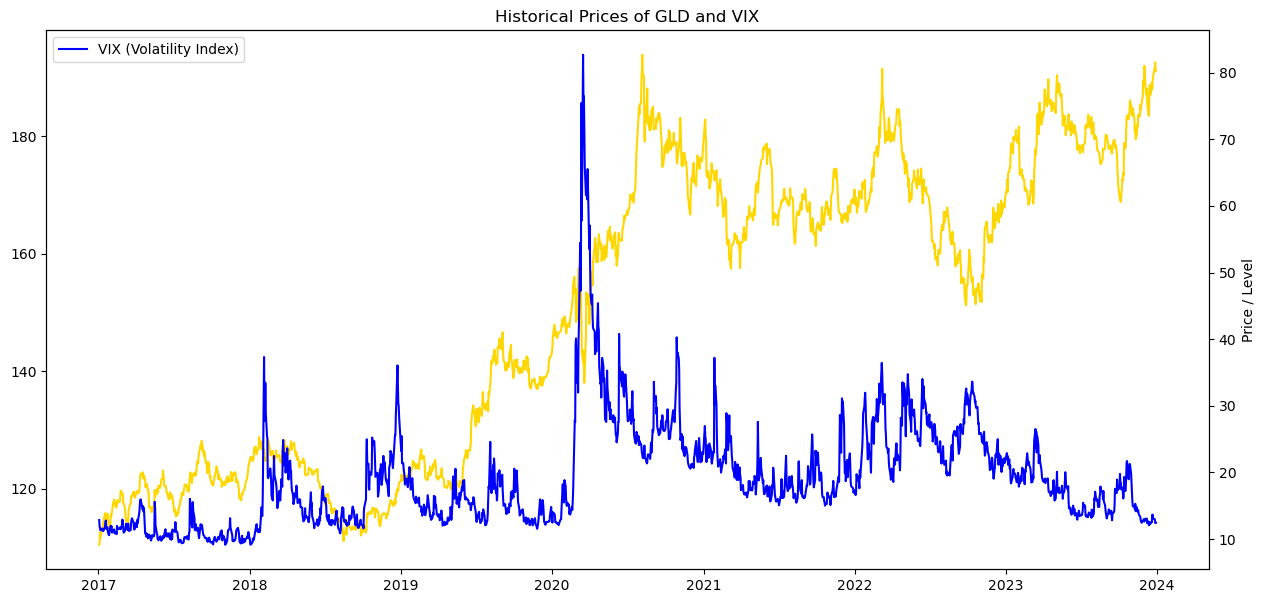

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))

# Plot GLD data
plt.plot(gold_data.index, gold_data, label='GLD (Gold ETF)', color='gold')
# plt.plot(stocks_data.index, stocks_data, label='stock', color='red')

# Plot VIX data
plt.twinx()
plt.plot(vix_data.index, vix_data, label='VIX (Volatility Index)', color='blue')
plt.title('Historical Prices of GLD and VIX')
plt.xlabel('Date')
plt.ylabel('Price / Level')
plt.legend(loc='upper left')

plt.show()

In [167]:
import yfinance as yf
import pandas as pd
import numpy as np

start_date = '2017-05-01'
end_date = '2024-02-01'

stock_symbols = ['GOOGL', 'CYCC', 'NPV', 'AMZN', 'PTLC', 'NFLX']
gold_symbol = 'GLD'
vix_symbol = '^VIX'
stocks_data = yf.download(stock_symbols, start=start_date, end=end_date, progress=False)['Adj Close']
gold_data = yf.download(gold_symbol, start=start_date, end=end_date, progress=False)['Adj Close']
vix_data = yf.download(vix_symbol, start=start_date, end=end_date, progress=False)['Adj Close']
daily_returns = stocks_data.pct_change().fillna(0)

# Assuming equal weight
weights = np.full(len(stock_symbols), 1 / len(stock_symbols))
portfolio_daily_return = daily_returns.dot(weights)

# Calculate the indicator: difference between the normalized values of GLD and VIX
indicator = (gold_data / gold_data.mean()) - (vix_data / vix_data.mean())

# Generate trading signals based on the indicator: 1 for long, 0 for hold
signals = np.where(indicator > 0, 1, 0)

# Apply the signals to the portfolio's daily returns
trading_returns = portfolio_daily_return * signals

# cumulative returns
signal_cumulative_returns = (1 + trading_returns).cumprod()

# Buy-and-hold strategy
buy_and_hold_cumulative_returns = (1 + portfolio_daily_return).cumprod()

comparison = pd.DataFrame({
    'Signal-Based': signal_cumulative_returns,
    'Buy-and-Hold': buy_and_hold_cumulative_returns
})

comparison


,Signal-Based,Buy-and-Hold
Date,,
2017-05-01,1.000000,1.000000
2017-05-02,1.008387,1.008387
2017-05-03,0.998085,0.998085
2017-05-04,0.992450,0.992450
2017-05-05,0.984348,0.984348
...,...,...
2024-01-25,4.948815,1.151569
2024-01-26,4.982716,1.159458
2024-01-29,5.083900,1.183003


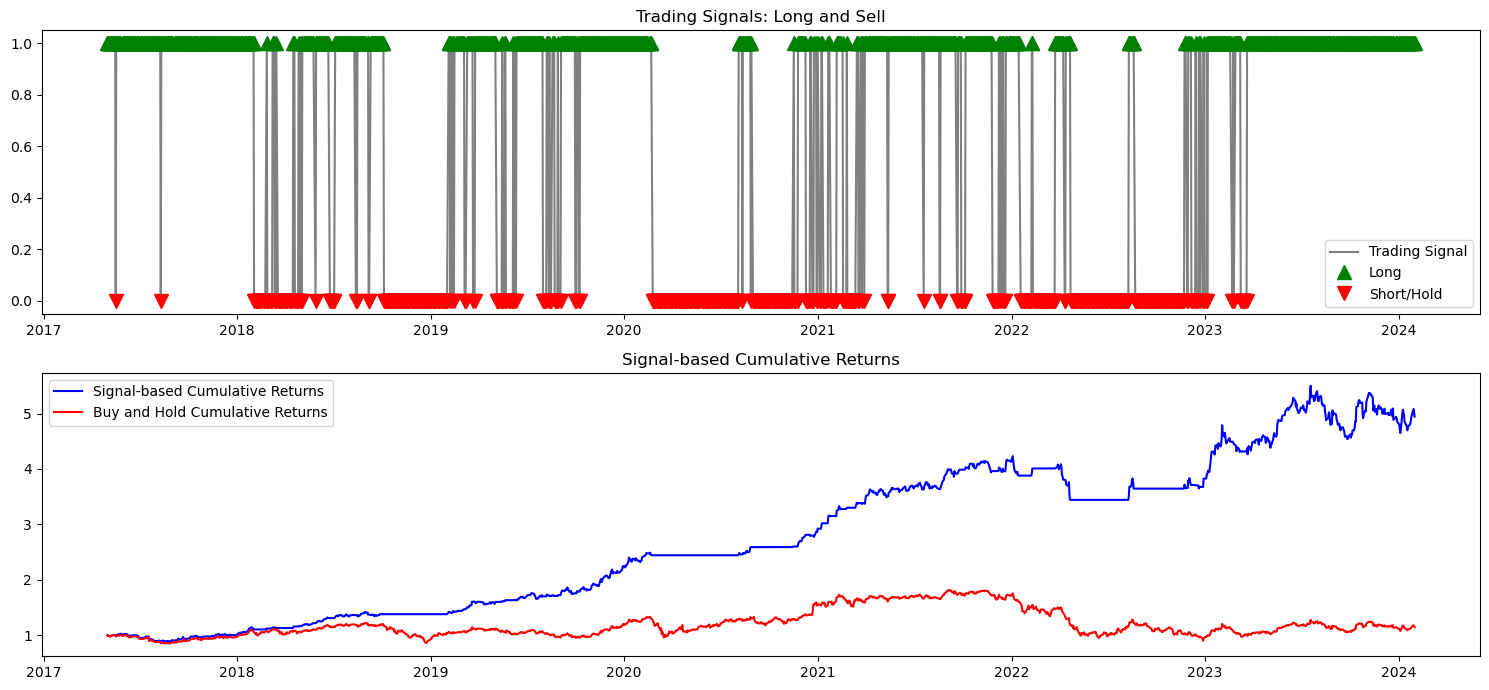

In [187]:
import matplotlib.pyplot as plt

signals_df = pd.DataFrame(signals, index=stocks_data.index, columns=['Signal'])
signal_cumulative_returns_df = pd.DataFrame(signal_cumulative_returns, index=stocks_data.index, columns=['Cumulative Returns'])

plt.figure(figsize=(15, 7))

#Long (1) as green, sell (0) as red
plt.subplot(2, 1, 1)
plt.plot(signals_df.index, signals_df['Signal'], label='Trading Signal', color='gray')
plt.plot(signals_df[signals_df['Signal'] == 1].index, signals_df['Signal'][signals_df['Signal'] == 1], '^', label='Long', color='green', markersize=10)
plt.plot(signals_df[signals_df['Signal'] == 0].index, signals_df['Signal'][signals_df['Signal'] == 0], 'v', label='Short/Hold', color='red', markersize=10)
plt.title('Trading Signals: Long and Sell')
plt.legend()

# Plot the signal-based cumulative returns
plt.subplot(2, 1, 2)
plt.plot(signal_cumulative_returns_df.index, signal_cumulative_returns_df['Cumulative Returns'], label='Signal-based Cumulative Returns', color='blue')
plt.plot(buy_and_hold_cumulative_returns, label='Buy and Hold Cumulative Returns', color="red")
plt.title('Signal-based Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()


In [169]:
trading_returns = portfolio_daily_return * signals
trading_returns_percentage = trading_returns * 100
trading_returns_percentage.name = 'Trading Returns (%)'
trading_returns_percentage.to_csv('trading_returns.csv', index=True)
print(trading_returns_percentage)

Date
2017-05-01    0.000000
2017-05-02    0.838702
2017-05-03   -1.021645
2017-05-04   -0.564590
2017-05-05   -0.816389
                ...   
2024-01-25    1.333816
2024-01-26    0.685030
2024-01-29    2.030713
2024-01-30   -1.287917
2024-01-31   -1.483310
Name: Trading Returns (%), Length: 1700, dtype: float64


In [170]:
spy_returns.corr(trading_returns_percentage)

0.20344650814113435

In [171]:
factors_df = pd.read_csv('ff_research.csv', index_col=0)
factors_df.index = pd.to_datetime(factors_df.index, format='%Y%m%d')
factors_df

,Mkt-RF,SMB,HML,RMW,CMA,RF
2017-05-01,0.21,0.25,-0.13,-0.17,-0.50,0.003
2017-05-02,0.03,-0.47,-0.21,0.40,-0.35,0.003
2017-05-03,-0.19,-0.52,0.22,-0.04,0.13,0.003
2017-05-04,0.02,-0.13,-0.36,0.36,-0.71,0.003
2017-05-05,0.46,0.11,0.00,-0.22,0.65,0.003
...,...,...,...,...,...,...
2024-01-25,0.46,0.20,0.56,-0.19,0.55,0.022
2024-01-26,-0.02,0.35,-0.27,0.22,-0.02,0.022
2024-01-29,0.85,0.89,-0.59,-1.13,-0.31,0.022
2024-01-30,-0.13,-0.96,0.84,1.00,0.13,0.022


In [172]:
CVNA = yf.download('CVNA', start='2017-05-01', end='2024-02-01')['Adj Close']
COST = yf.download('CVNA', start='2017-05-01', end='2024-02-01')['Adj Close']
cvna_daily_return = CVNA.pct_change().fillna(0)
cost_daily_return = COST.pct_change().fillna(0)
cvna_daily_return.name = "cvna"
cost_daily_return.name = "cost"

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [173]:
print(trading_returns_percentage)
print(CVNA)
print(COST)
print(factors_df)
combined_data = pd.concat([trading_returns_percentage, cvna_daily_return, cost_daily_return, factors_df], axis=1)
combined_data

Date
2017-05-01    0.000000
2017-05-02    0.838702
2017-05-03   -1.021645
2017-05-04   -0.564590
2017-05-05   -0.816389
                ...   
2024-01-25    1.333816
2024-01-26    0.685030
2024-01-29    2.030713
2024-01-30   -1.287917
2024-01-31   -1.483310
Name: Trading Returns (%), Length: 1700, dtype: float64
Date
2017-05-01    10.770000
2017-05-02    10.100000
2017-05-03     8.720000
2017-05-04     9.980000
2017-05-05    10.920000
                ...    
2024-01-25    41.000000
2024-01-26    41.799999
2024-01-29    44.919998
2024-01-30    44.139999
2024-01-31    43.060001
Name: Adj Close, Length: 1700, dtype: float64
Date
2017-05-01    10.770000
2017-05-02    10.100000
2017-05-03     8.720000
2017-05-04     9.980000
2017-05-05    10.920000
                ...    
2024-01-25    41.000000
2024-01-26    41.799999
2024-01-29    44.919998
2024-01-30    44.139999
2024-01-31    43.060001
Name: Adj Close, Length: 1700, dtype: float64
            Mkt-RF   SMB   HML   RMW   CMA     RF
2017-0

,Trading Returns (%),cvna,cost,Mkt-RF,SMB,HML,RMW,CMA,RF
2017-05-01,0.000000,0.000000,0.000000,0.21,0.25,-0.13,-0.17,-0.50,0.003
2017-05-02,0.838702,-0.062210,-0.062210,0.03,-0.47,-0.21,0.40,-0.35,0.003
2017-05-03,-1.021645,-0.136634,-0.136634,-0.19,-0.52,0.22,-0.04,0.13,0.003
2017-05-04,-0.564590,0.144495,0.144495,0.02,-0.13,-0.36,0.36,-0.71,0.003
2017-05-05,-0.816389,0.094188,0.094188,0.46,0.11,0.00,-0.22,0.65,0.003
...,...,...,...,...,...,...,...,...,...
2024-01-25,1.333816,-0.024506,-0.024506,0.46,0.20,0.56,-0.19,0.55,0.022
2024-01-26,0.685030,0.019512,0.019512,-0.02,0.35,-0.27,0.22,-0.02,0.022
2024-01-29,2.030713,0.074641,0.074641,0.85,0.89,-0.59,-1.13,-0.31,0.022
2024-01-30,-1.287917,-0.017364,-0.017364,-0.13,-0.96,0.84,1.00,0.13,0.022


In [189]:
combined_data[['Trading Returns (%)','cvna', 'cost','Mkt-RF', 'RF']].corr()

,Trading Returns (%),cvna,cost,Mkt-RF,RF
Trading Returns (%),1.000000,0.186368,0.186368,0.214614,0.009322
cvna,0.186368,1.000000,1.000000,0.448296,0.033140
cost,0.186368,1.000000,1.000000,0.448296,0.033140
Mkt-RF,0.214614,0.448296,0.448296,1.000000,-0.010049
RF,0.009322,0.033140,0.033140,-0.010049,1.000000


In [190]:
import statsmodels.api as sm
Y = combined_data['Trading Returns (%)']
X = combined_data[['cvna', 'cost','Mkt-RF', 'RF']]
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Trading Returns (%)   R-squared:                       0.056
Model:                             OLS   Adj. R-squared:                  0.055
Method:                  Least Squares   F-statistic:                     33.72
Date:                 Sun, 17 Mar 2024   Prob (F-statistic):           3.64e-21
Time:                         16:37:03   Log-Likelihood:                -2333.2
No. Observations:                 1700   AIC:                             4674.
Df Residuals:                     1696   BIC:                             4696.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0805      0.033      2.42

In [176]:
coefs = pd.DataFrame({
    'Coefficients': model.params,
    'Standard Error': model.bse,
    't Stat': model.tvalues,
    'P-value': model.pvalues,
    'Lower 95%': model.conf_int()[0],
    'Upper 95%': model.conf_int()[1]
})

print(coefs)

        Coefficients  Standard Error    t Stat       P-value  Lower 95%  \
const       0.080489        0.033253  2.420527  1.560249e-02   0.015268   
cvna        0.822334        0.193080  4.259033  2.165702e-05   0.443634   
cost        0.822334        0.193080  4.259033  2.165702e-05   0.443634   
Mkt-RF      0.127466        0.020486  6.221973  6.171428e-10   0.087285   
RF          1.067766        3.479747  0.306852  7.589940e-01  -5.757284   

        Upper 95%  
const    0.145709  
cvna     1.201035  
cost     1.201035  
Mkt-RF   0.167647  
RF       7.892816  
